# Import Packages

In [0]:


%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt


import numpy.linalg as la 
from scipy.linalg import lu_factor, lu_solve

!pip3 install --upgrade dmba
!pip3 install graphviz
!pip3 install pydotplus
from pathlib import Path
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image  
import matplotlib as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.externals.six import StringIO


!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

%tensorflow_version 1.x
%matplotlib inline 

import sys
!{sys.executable} -m pip install dmba

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, Adam
from keras.losses import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()



Requirement already up-to-date: dmba in /usr/local/lib/python3.6/dist-packages (0.0.12)
TensorFlow is already loaded. Please restart the runtime to change versions.


# Load data


In [0]:
# loading Facebook dataset as pandas dataframe
df = pd.read_csv('/content/Modified Housing with School.csv')

# printing the first five rows of the dataset
print("First five rows of the dataset:")
df.head(5)

First five rows of the dataset:


,final_price,list_price,bedrooms,Dens,bathrooms,size,parking,type,latitude,longitude,mean_district_income,district_code,School_min_dist_km
0,545000,559900,3,2,3,1300,1,Condo Townhouse,43.742861,-79.600133,31771,1,0.575218
1,334000,333289,1,0,1,550,1,Condo Apt,43.731744,-79.577292,31771,1,0.584261
2,448500,449900,2,0,1,750,1,Condo Apt,43.724674,-79.615343,31771,1,0.560901
3,402500,389900,1,1,1,650,1,Condo Apt,43.724658,-79.615428,31771,1,0.558697
4,530000,539000,3,1,2,1500,3,Condo Townhouse,43.743761,-79.598762,31771,1,0.456445


In [0]:
def format_function(DataFrame):
  # drop NaNs
  DataFrame.dropna()
  DataFrame['type']=number.fit_transform(DataFrame['type'].astype('str'))
  return df

In [0]:
# Running Preprocessing Functions
df = format_function(df)

# Defining Features (X) and Target (Y)
X = df.drop(['final_price'], axis = 1)
Y = df['final_price']

# Model 1 LU Decompositon

In [0]:
# Using LU Decomposition to solve

M = X

ones_column = np.transpose(np.matrix(np.repeat(a=1, repeats= M.shape[0])))
M = np.column_stack((ones_column, X))

mTranspose = M.transpose()
mModified = np.matmul(mTranspose, M)

# We want to LU Decompose mModified
lu, piv = lu_factor(mModified)

# 
Ymod = np.matmul(mTranspose, Y.transpose())

# Now we will solve the system using LU Decomposition
R = lu_solve((lu, piv), Ymod)

# Print out R
print("R contains:")
print()
print(R)

R contains:

[ 1.15109274e+07  9.54001189e-01  1.19653486e+04 -4.80851735e+02
 -4.42792335e+03  5.38427991e+00 -4.03898375e+03  6.12491673e+03
 -2.27718287e+05  1.98281845e+04  1.58527096e-01  1.05611347e+02
 -1.45161325e+04]


In [0]:
# Regression Testing
random = 10700

answer = np.dot(M[random, :], R)
answer = np.array(answer).ravel()
answer = np.array(answer).flatten()

print("Asking Price:    ", X['list_price'][random])
print("Predicted Price: ", answer)
print("Sold For:        ", Y.transpose()[random])

Asking Price:     349000
Predicted Price:  [369228.39184401]
Sold For:         355000


In [0]:
# Regression Testing
predicted = []
error = []
repeats = M.shape[0]
 
# For loop to find the Y-hat, and the difference between Y-hat and Y for every row of our dataset
for i in range(0, repeats):
  predicted.append(np.dot(M[i, :], R)) #finds Y-hat
  error.append((predicted[i]-Y.transpose()[i])**2) #squares the difference between the Y-hat and Y
 
# Finding the mean squared error
mse = np.mean(error)
 
print("Regression Summary")
print("Root Mean Squared Error:", np.round(np.sqrt(mse), 2))
print()
print("Standard Deviation:", np.std(Y))

Regression Summary
Root Mean Squared Error: 58430.98

Standard Deviation: 519029.39730199106


In [0]:
predicted = np.array(predicted)
regressionSummary(Y, predicted[:,0,0])
print("Model R_2 Score: {}".format(round(r2_score(Y, predicted[:,0,0]),3)))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 58430.9781
            Mean Absolute Error (MAE) : 33054.0824
          Mean Percentage Error (MPE) : -0.4248
Mean Absolute Percentage Error (MAPE) : 4.2476
Model R_2 Score: 0.987


# Model 2 Linear Regression

In [0]:
# Train Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.3, random_state=1)

# Set variables for mean and std
house_value_mean = df["final_price"].mean()
house_value_sd = df["final_price"].std()


In [0]:
# fit a linear regression model
model = LinearRegression()
model.fit(train_X, train_y)

# print coefficients
print('intercept ', model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': model.coef_}))

intercept  11450559.447379246
               Predictor    coefficient
0             list_price       0.955865
1               bedrooms   12633.765645
2                   Dens    1147.463874
3              bathrooms   -4003.904162
4                   size       2.482775
5                parking   -4193.870668
6                   type    5906.086675
7               latitude -225348.309378
8              longitude   20367.010953
9   mean_district_income       0.172460
10         district_code      91.224174
11    School_min_dist_km  -14031.428667


In [0]:
# print performance measures
regressionSummary(train_y, model.predict(train_X))

pred_y = model.predict(train_X)

print()
print('AIC : ', AIC_score(train_y, pred_y, model))
print('BIC : ', BIC_score(train_y, pred_y, model))
print("Model R_2 Score: {}".format(round(r2_score(train_y, pred_y),3)))




Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 58846.4771
            Mean Absolute Error (MAE) : 33076.7614
          Mean Percentage Error (MPE) : -0.4154
Mean Absolute Percentage Error (MAPE) : 4.2422

AIC :  186027.58347336698
BIC :  186124.4988227692
Model R_2 Score: 0.987


In [0]:
# Use predict() to make predictions on a new set
prediction = model.predict(valid_X)

result = pd.DataFrame({'Predicted': prediction, 'Actual': valid_y,
                       'Residual': valid_y - prediction})
print(np.round(result.head(20), 2))


        Predicted   Actual   Residual
1569    660830.69   683000   22169.31
674     451407.65   460000    8592.35
5735    796218.27   793000   -3218.27
4437    705591.05   765000   59408.95
8635    599405.46   595000   -4405.46
2336    877836.83   880000    2163.17
4520    405231.19   445000   39768.81
4326    764880.20   733000  -31880.20
6987    441587.88   425000  -16587.88
911     460470.99   435000  -25470.99
5971    739119.14   710000  -29119.14
9790    404661.34   400000   -4661.34
4286   1043326.46  1150000  106673.54
5943   1161072.56  1190000   28927.44
10548   668035.49   635000  -33035.49
1416    731441.35   720000  -11441.35
9514   1847061.94  1825000  -22061.94
7837    755774.32   735000  -20774.32
134     403129.49   405000    1870.51
2298    600752.47   614000   13247.53


In [0]:
# Compute common accuracy measures
regressionSummary(valid_y, prediction)
print("Model R_2 Score: {}".format(round(r2_score(valid_y, model.predict(valid_X)),3)))


Regression statistics

                      Mean Error (ME) : -1179.5193
       Root Mean Squared Error (RMSE) : 57509.6469
            Mean Absolute Error (MAE) : 33123.2739
          Mean Percentage Error (MPE) : -0.5670
Mean Absolute Percentage Error (MAPE) : 4.2446
Model R_2 Score: 0.988


# Model 3 Decision Tree

In [0]:
# change to categorical values
df['bedrooms'] = df['bedrooms'].astype('category')
df['Dens'] = df['Dens'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')
df['parking'] = df['parking'].astype('category')
df['type'] = df['type'].astype('category')
df['district_code'] = df['district_code'].astype('category')

In [0]:
#Set predictor columns and outcome columns

predictors = ['list_price', 'bedrooms', 'Dens', 'bathrooms', 'size', 'parking', 
              'type', 'latitude', 'longitude', 'mean_district_income', 'district_code', 'School_min_dist_km']
outcome = 'final_price'

# Dummy Variables for predictors, drop outcome variable and assign X and Y

X_Model_3 = pd.get_dummies(df[predictors], drop_first=True)
y_Model_3 = df[outcome]


# Split Train and Test 
train_X, valid_X, train_y, valid_y = train_test_split(X_Model_3, y_Model_3, test_size=0.4, random_state=1)

In [0]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15 ], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [10, 11, 12, 13, 14, 15], 
    'min_impurity_decrease': [0, 0.005, 0.01, 0.05], 
    'min_samples_split': [6,7,8, 9, 10], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 6}


In [0]:
regressionSummary(train_y, regTree.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 38742.5249
            Mean Absolute Error (MAE) : 23068.2819
          Mean Percentage Error (MPE) : -0.1947
Mean Absolute Percentage Error (MAPE) : 3.0646


In [0]:
regressionSummary(valid_y, regTree.predict(valid_X))
print("Model R_2 Score: {}".format(round(r2_score(valid_y, regTree.predict(valid_X)),3)))


Regression statistics

                      Mean Error (ME) : 1604.7893
       Root Mean Squared Error (RMSE) : 70643.6959
            Mean Absolute Error (MAE) : 35431.2809
          Mean Percentage Error (MPE) : -0.1888
Mean Absolute Percentage Error (MAPE) : 4.1026
Model R_2 Score: 0.981


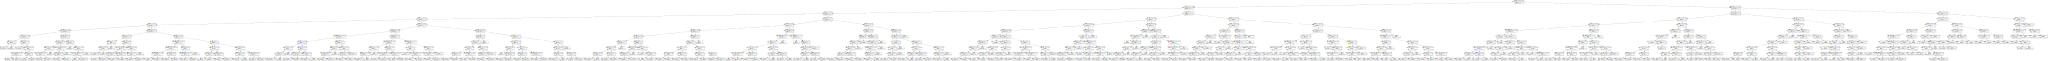

In [0]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(regTree, out_file=None, feature_names=X_Model_3.columns))

# Model 4 Neural Network

In [0]:
# Load Dataset 
house_df = pd.read_csv("Modified Housing with School.csv")
house_df.head()


,final_price,list_price,bedrooms,Dens,bathrooms,size,parking,type,latitude,longitude,mean_district_income,district_code,School_min_dist_km
0,545000,559900,3,2,3,1300,1,Condo Townhouse,43.742861,-79.600133,31771,1,0.575218
1,334000,333289,1,0,1,550,1,Condo Apt,43.731744,-79.577292,31771,1,0.584261
2,448500,449900,2,0,1,750,1,Condo Apt,43.724674,-79.615343,31771,1,0.560901
3,402500,389900,1,1,1,650,1,Condo Apt,43.724658,-79.615428,31771,1,0.558697
4,530000,539000,3,1,2,1500,3,Condo Townhouse,43.743761,-79.598762,31771,1,0.456445


In [0]:
# Convert all string categories to integers
house_df['type']=number.fit_transform(house_df['type'].astype('str'))


In [0]:
# Set variables for mean and std
house_value_mean = house_df["final_price"].mean()
house_value_sd = house_df["final_price"].std()

# Normalize Dataset
house_norm = (house_df - house_df.mean()) / house_df.std()

# Verify 
house_norm.tail()

,final_price,list_price,bedrooms,Dens,bathrooms,size,parking,type,latitude,longitude,mean_district_income,district_code,School_min_dist_km
10708,0.256644,0.264636,1.946648,0.931761,1.091706,0.916392,0.805341,1.231308,0.787026,2.266267,-0.111745,1.908475,-0.792669
10709,-0.454651,-0.490346,0.985879,0.931761,0.112024,0.554771,-0.174402,0.461345,0.860717,2.189482,-0.111745,1.908475,-0.151351
10710,0.006188,0.077167,1.946648,2.648052,0.112024,1.639635,2.764827,1.231308,0.762262,2.215358,-0.111745,1.908475,0.259598
10711,-0.371808,-0.360007,0.025111,-0.784531,0.112024,-0.023823,0.805341,-0.308618,0.869595,2.196072,-0.111745,1.908475,-0.409356
10712,-0.115187,-0.037092,0.025111,0.931761,0.112024,0.844068,-0.174402,-0.308618,0.869595,2.196072,-0.111745,1.908475,-0.409356


In [0]:
# Features for training
features = house_norm.columns
features = features.drop("final_price")

In [0]:
# Split into training and testing data
train_portion = 0.7
train_rows = int(house_norm.shape[0] * train_portion)
shuffled_data = house_norm.sample(frac=1)
train_data = shuffled_data[:train_rows]
test_data = shuffled_data[train_rows:]

In [0]:
# Divide training data and labels
train_labels = train_data["final_price"]
train_data = train_data[features]

test_labels = test_data["final_price"]
test_data = test_data[features]

In [0]:
print(train_labels.tail())
print(train_data.tail())

9684   -0.138306
4237    0.699758
2636    4.071279
2005   -0.330964
2379   -0.504357
Name: final_price, dtype: float64
      list_price  bedrooms  ...  district_code  School_min_dist_km
9684   -0.113706  0.985879  ...       1.530403            0.240243
4237    0.794314  0.985879  ...      -0.197927           -0.989924
2636    4.049947  0.025111  ...      -0.819046            2.013359
2005   -0.302877  0.025111  ...      -1.089097            1.222413
2379   -0.537449  0.025111  ...      -0.900061           -0.968291

[5 rows x 12 columns]


In [0]:
# Split between training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=2)

In [0]:
print(X_train.head())
print(X_train.shape)

      list_price  bedrooms  ...  district_code  School_min_dist_km
4151    0.453807  1.946648  ...      -0.332953           -0.905701
8849    1.967174  0.025111  ...       0.963295           -1.266926
4900   -0.603848 -1.896426  ...       0.153140           -0.071671
1174    0.170050  0.025111  ...      -1.413159           -0.869542
131    -0.660412  0.025111  ...      -1.818236            1.013721

[5 rows x 12 columns]
(5249, 12)


In [0]:
NN_model = Sequential()
NN_model.add(Dense(30, input_dim=12, activation="relu"))
NN_model.add(Dense(15, activation="relu"))
NN_model.add(Dense(1))
NN_model.compile(optimizer='rmsprop', loss='mse')

In [0]:
history = NN_model.fit(X_train, Y_train, epochs=40, validation_data=(X_val, Y_val), verbose=2)




Train on 5249 samples, validate on 2250 samples
Epoch 1/40





 - 1s - loss: 0.6325 - val_loss: 0.1978
Epoch 2/40
 - 0s - loss: 0.1126 - val_loss: 0.0525
Epoch 3/40
 - 0s - loss: 0.0385 - val_loss: 0.0382
Epoch 4/40
 - 0s - loss: 0.0255 - val_loss: 0.0265
Epoch 5/40
 - 0s - loss: 0.0211 - val_loss: 0.0229
Epoch 6/40
 - 0s - loss: 0.0183 - val_loss: 0.0317
Epoch 7/40
 - 0s - loss: 0.0170 - val_loss: 0.0196
Epoch 8/40
 - 0s - loss: 0.0156 - val_loss: 0.0264
Epoch 9/40
 - 0s - loss: 0.0152 - val_loss: 0.0177
Epoch 10/40
 - 0s - loss: 0.0146 - val_loss: 0.0165
Epoch 11/40
 - 0s - loss: 0.0139 - val_loss: 0.0168
Epoch 12/40
 - 0s - loss: 0.0138 - val_loss: 0.0173
Epoch 13/40
 - 0s - loss: 0.0133 - val_loss: 0.0183
Epoch 14/40
 - 0s - loss: 0.0130 - val_loss: 0.0202
Epoch 15/40
 - 0s - loss: 0.0125 - val_loss: 0.0370
Epoch 16/40
 - 0s - loss: 0.0126 - val_loss: 0.0177
Epoch 17/40
 - 0s - loss: 0.0122 - val_loss: 0.0163
Epoch 18/40
 - 0s - loss: 0.0122 - val_loss: 0.0163
Epoch 19/40
 - 0s

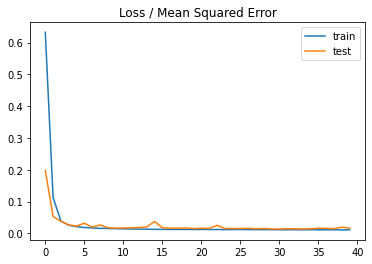

In [0]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
predict = NN_model.predict(test_data)
prediction = predict[:,0]*house_value_sd + house_value_mean
Original_Final_Price = test_labels*house_value_sd + house_value_mean
print("Predictions for test housing prices is: {}".format(prediction))

Predictions for test housing prices is: [ 505161.94  421960.16  537648.7  ...  333833.72  580801.   1029159.4 ]


In [0]:
regressionSummary(Original_Final_Price,prediction)
print("Model R_2 Score: {}".format(round(r2_score(Original_Final_Price, prediction),3)))


Regression statistics

                      Mean Error (ME) : 26274.6490
       Root Mean Squared Error (RMSE) : 70129.5752
            Mean Absolute Error (MAE) : 39146.0349
          Mean Percentage Error (MPE) : 3.1294
Mean Absolute Percentage Error (MAPE) : 4.8351
Model R_2 Score: 0.98


# Ensemble Models - Simple average method

In [0]:
#to clean the data
df = pd.read_csv('/content/Modified Housing with School.csv')
def format_function(DataFrame):
  # drop NaNs
  DataFrame.dropna()
  DataFrame['type']=number.fit_transform(DataFrame['type'].astype('str'))
  return df

# Set variables for mean and std
house_value_mean = df["final_price"].mean()
house_value_sd = df["final_price"].std()

# Running Preprocessing Functions
df = format_function(df)

# Defining Features (X) and Target (Y)
X = df.drop(['final_price'], axis = 1)
y = df['final_price']

# Train Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
# to apply simple average method
def ensemble_models(predictors):
  # define the 1st model LU Decomposition model
  ones_column = np.transpose(np.matrix(np.repeat(a=1, repeats= predictors.shape[0])))
  predictor_model_1 = np.column_stack((ones_column, predictors))
  answer = np.dot(predictor_model_1,R)
  answer = np.array(answer)
  model_1=answer[0,:]
  # define the 2nd model LR model
  model_2 = model.predict(predictors)     
  # define the 4th model NN model
  model_4 = NN_model.predict(predictors)  
  model_4 = model_4[:,0]
  # define the 3rd model Regression Tree model
  df['bedrooms'] = df['bedrooms'].astype('category')
  df['Dens'] = df['Dens'].astype('category')
  df['bathrooms'] = df['bathrooms'].astype('category')
  df['parking'] = df['parking'].astype('category')
  df['type'] = df['type'].astype('category')
  df['district_code'] = df['district_code'].astype('category')
  variables = ['list_price', 'bedrooms', 'Dens', 'bathrooms', 'size', 'parking', 
              'type', 'latitude', 'longitude', 'mean_district_income', 'district_code', 'School_min_dist_km']
  X_model_3 = pd.get_dummies(df[variables], drop_first=True)
  y_model_3 = df[outcome]
  train_X_3, valid_X_3, train_y_3, valid_y_3 = train_test_split(X_model_3, y_model_3, test_size=0.3, random_state=1) 
  predictors = valid_X_3
  model_3 = regTree.predict(predictors)
  finalpred = (model_1+model_2 + model_3 + model_4)/4
  return finalpred

In [0]:
ensemble_models(valid_X)

array([613367.88083231, 427759.72621173, 744695.81809085, ...,
       396290.85919127, 744211.31756641, 416573.55807843])

In [0]:
regressionSummary(valid_y, ensemble_models(valid_X))
print("Model R_2 Score: {}".format(round(r2_score(valid_y, ensemble_models(valid_X)),3)))


Regression statistics

                      Mean Error (ME) : 42276.0152
       Root Mean Squared Error (RMSE) : 76616.1816
            Mean Absolute Error (MAE) : 45755.2130
          Mean Percentage Error (MPE) : 5.2117
Mean Absolute Percentage Error (MAPE) : 5.6563
Model R_2 Score: 0.978


# Load data without list price

In [0]:
# loading Facebook dataset as pandas dataframe
df = pd.read_csv('/content/Modified Housing with School.csv')

def format_function(DataFrame):
  # drop NaNs
  DataFrame.dropna()
  DataFrame['type']=number.fit_transform(DataFrame['type'].astype('str'))
  return df

# Running Preprocessing Functions
df = format_function(df)

# Defining Features (X) and Target (Y)
X = df.drop(['final_price','list_price'], axis = 1)
Y = df['final_price']

# Train Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.3, random_state=1)

# Model 1 LU Decomposition without list price


In [0]:

M = X

ones_column = np.transpose(np.matrix(np.repeat(a=1, repeats= M.shape[0])))
M = np.column_stack((ones_column, X))

mTranspose = M.transpose()
mModified = np.matmul(mTranspose, M)

# We want to LU Decompose mModified
lu, piv = lu_factor(mModified)

# 
Ymod = np.matmul(mTranspose, Y.transpose())

# Now we will solve the system using LU Decomposition
R = lu_solve((lu, piv), Ymod)

# Print out R
print("R contains:")
print()
print(R)# Regression Testing
random = 10700



R contains:

[ 8.58937122e+07 -7.24886357e+04 -3.86628758e+02  9.84517050e+04
  4.96316648e+02  5.98279035e+03  2.36890811e+04 -1.53130754e+06
  2.41626534e+05  4.83756165e+00  2.27092727e+02 -5.53632438e+04]


In [0]:
answer = np.dot(M[random, :], R)
answer = np.array(answer).ravel()
answer = np.array(answer).flatten()
# Regression Testing
random = 10700

answer = np.dot(M[random, :], R)
answer = np.array(answer).ravel()
answer = np.array(answer).flatten()

print("Asking Price:    ", df['list_price'][random])
print("Predicted Price: ", answer)
print("Sold For:        ", Y.transpose()[random])

#huge error 

Asking Price:     349000
Predicted Price:  [723746.13148095]
Sold For:         355000


In [0]:
# Regression Testing
predicted = []
error = []
repeats = M.shape[0]
 
# For loop to find the Y-hat, and the difference between Y-hat and Y for every row of our dataset
for i in range(0, repeats):
  predicted.append(np.dot(M[i, :], R)) #finds Y-hat
  error.append((predicted[i]-Y.transpose()[i])**2) #squares the difference between the Y-hat and Y
 
# Finding the mean squared error
mse = np.mean(error)
 
print("Regression Summary")
print("Root Mean Squared Error:", np.round(np.sqrt(mse), 2))
print()
print("Standard Deviation:", np.std(Y))


Regression Summary
Root Mean Squared Error: 265132.58

Standard Deviation: 519029.39730199106


In [0]:
predicted = np.array(predicted)
regressionSummary(Y, predicted[:,0,0])
print("Model R_2 Score: {}".format(round(r2_score(Y, predicted[:,0,0]),3)))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 265132.5761
            Mean Absolute Error (MAE) : 167104.7555
          Mean Percentage Error (MPE) : -4.9758
Mean Absolute Percentage Error (MAPE) : 22.9039
Model R_2 Score: 0.739


# Model 2 Linear Regression without list price

In [0]:
# fit a linear regression model
model_lr_2 = LinearRegression()
model_lr_2.fit(train_X, train_y)

# print coefficients
print('intercept ', model_lr_2.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': model_lr_2.coef_}))
# print performance measures
regressionSummary(train_y, model_lr_2.predict(train_X))

pred_y = model_lr_2.predict(train_X)

print()
print("Model R Score: {}".format(round(r2_score(train_y, pred_y),3)))
print('AIC : ', AIC_score(train_y, pred_y, model_lr_2))
print('BIC : ', BIC_score(train_y, pred_y, model_lr_2))

intercept  92044192.48467629
               Predictor   coefficient
0               bedrooms -6.489955e+04
1                   Dens  1.394844e+02
2              bathrooms  1.000320e+05
3                   size  4.836108e+02
4                parking  3.206553e+03
5                   type  2.460951e+04
6               latitude -1.618067e+06
7              longitude  2.713176e+05
8   mean_district_income  4.709452e+00
9          district_code  2.017125e+02
10    School_min_dist_km -5.763789e+04

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 264024.8234
            Mean Absolute Error (MAE) : 166897.5435
          Mean Percentage Error (MPE) : -4.8754
Mean Absolute Percentage Error (MAPE) : 22.8952

Model R Score: 0.741
AIC :  208539.24861058246
BIC :  208629.2414350274


In [0]:
# Use predict() to make predictions on a new set
prediction = model_lr_2.predict(valid_X)

result = pd.DataFrame({'Predicted': prediction, 'Actual': valid_y,
                       'Residual': valid_y - prediction})
print(np.round(result.head(20), 2))

        Predicted   Actual   Residual
1569    933465.87   683000 -250465.87
674     619943.29   460000 -159943.29
5735    915431.02   793000 -122431.02
4437    707052.73   765000   57947.27
8635    515641.43   595000   79358.57
2336    426094.81   880000  453905.19
4520    418600.18   445000   26399.82
4326    983695.21   733000 -250695.21
6987    518823.09   425000  -93823.09
911     520582.53   435000  -85582.53
5971    651762.26   710000   58237.74
9790    299414.60   400000  100585.40
4286   1149889.90  1150000     110.10
5943    907465.66  1190000  282534.34
10548   839469.30   635000 -204469.30
1416    817615.23   720000  -97615.23
9514   1821327.15  1825000    3672.85
7837    988412.64   735000 -253412.64
134     430087.35   405000  -25087.35
2298    569336.28   614000   44663.72ERROR! Session/line number was not unique in
 database. History logging moved to new session 61


In [0]:
print("Model R_2 Score: {}".format(round(r2_score(valid_y, model.predict(valid_X)),3)))

In [0]:
# Compute common accuracy measures
regressionSummary(valid_y, prediction)
print("Model R_2 Score: {}".format(round(r2_score(valid_y, prediction),3)))


Regression statistics
ERROR! Session/line number was not unique in database. History logging moved to new session 76

                      Mean Error (ME) : 12160.3212
       Root Mean Squared Error (RMSE) : 268213.3745
            Mean Absolute Error (MAE) : 166871.1757
          Mean Percentage Error (MPE) : -3.4879
Mean Absolute Percentage Error (MAPE) : 22.7479
Model R_2 Score: 0.734


# Model 3 Decision Tree without list price

In [0]:
df = pd.read_csv('/content/Modified Housing with School.csv') 
df = df.drop(columns='list_price')    #drop list price as predictor
# change to categorical values
df['bedrooms'] = df['bedrooms'].astype('category')
df['Dens'] = df['Dens'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')
df['parking'] = df['parking'].astype('category')
df['type'] = df['type'].astype('category')
df['district_code'] = df['district_code'].astype('category')
#Set predictor columns and outcome columns

predictors = ['bedrooms', 'Dens', 'bathrooms', 'size', 'parking', 
              'type', 'latitude', 'longitude', 'mean_district_income', 'district_code', 'School_min_dist_km']
outcome = 'final_price'

# Dummy Variables for predictors, drop outcome variable and assign X and Y

X_model_3_v2 = pd.get_dummies(df[predictors], drop_first=True)
y_model_3_v2 = df[outcome]


# Split Train and Test 
train_X, valid_X, train_y, valid_y = train_test_split(X_model_3_v2, y_model_3_v2, test_size=0.4, random_state=1)
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15 ], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [10, 11, 12, 13, 14, 15], 
    'min_impurity_decrease': [0, 0.005, 0.01, 0.05], 
    'min_samples_split': [6,7,8, 9, 10], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree_2 = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 30}
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}


In [0]:
regressionSummary(train_y, regTree_2.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 103455.9597
            Mean Absolute Error (MAE) : 54383.0855
          Mean Percentage Error (MPE) : -0.8343
Mean Absolute Percentage Error (MAPE) : 6.5006


In [0]:
regressionSummary(valid_y, regTree_2.predict(valid_X))
print("Model R_2 Score: {}".format(round(r2_score(valid_y, regTree_2.predict(valid_X)),3)))


Regression statistics

                      Mean Error (ME) : -2048.7291
       Root Mean Squared Error (RMSE) : 231842.6290
            Mean Absolute Error (MAE) : 110882.7993
          Mean Percentage Error (MPE) : -2.3453
Mean Absolute Percentage Error (MAPE) : 12.2558
Model R_2 Score: 0.801


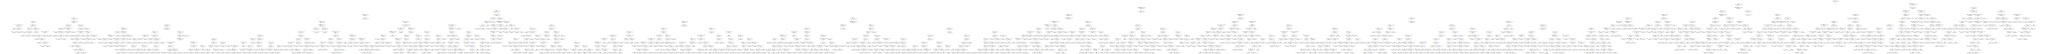

In [0]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(regTree_2, out_file=None, feature_names=X_model_3_v2.columns))

# Model 4 Neural Network without list price

In [0]:
# Load Dataset 
house_df = pd.read_csv("/content/Modified Housing with School.csv")
house_df.tail()
# Convert all string categories to integers
house_df['type']=number.fit_transform(house_df['type'].astype('str'))

# Set variables for mean and std
house_value_mean = house_df["final_price"].mean()
house_value_sd = house_df["final_price"].std()

# Normalize Dataset
house_norm = (house_df - house_df.mean()) / house_df.std()

# Verify 
house_norm.tail()


# Features for training
features = house_norm.columns
features = features.drop(["final_price", 'list_price'])
# Split into training and testing data
train_portion = 0.7
train_rows = int(house_norm.shape[0] * train_portion)
shuffled_data = house_norm.sample(frac=1)
train_data = shuffled_data[:train_rows]
test_data = shuffled_data[train_rows:]
# Divide training data and labels
train_labels = train_data["final_price"]
train_data = train_data[features]

test_labels = test_data["final_price"]
test_data = test_data[features]
# Split between training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=2)

In [0]:
model_NN_2 = Sequential()
model_NN_2.add(Dense(30, input_dim=11, activation="relu"))
model_NN_2.add(Dense(15, activation="relu"))
model_NN_2.add(Dense(1))
model_NN_2.compile(optimizer='rmsprop', loss='mse')
history_NN2 = model_NN_2.fit(X_train, Y_train, epochs=40, validation_data=(X_val, Y_val), verbose=2)

Train on 5249 samples, validate on 2250 samples
Epoch 1/40
 - 0s - loss: 0.4285 - val_loss: 0.2270
Epoch 2/40
 - 0s - loss: 0.1983 - val_loss: 0.1686
Epoch 3/40
 - 0s - loss: 0.1720 - val_loss: 0.1549
Epoch 4/40
 - 0s - loss: 0.1609 - val_loss: 0.1642
Epoch 5/40
 - 0s - loss: 0.1559 - val_loss: 0.1499
Epoch 6/40
 - 0s - loss: 0.1506 - val_loss: 0.1447
Epoch 7/40
 - 0s - loss: 0.1475 - val_loss: 0.1401
Epoch 8/40
 - 0s - loss: 0.1437 - val_loss: 0.1383
Epoch 9/40
 - 0s - loss: 0.1405 - val_loss: 0.1445
Epoch 10/40
 - 0s - loss: 0.1382 - val_loss: 0.1360
Epoch 11/40
 - 0s - loss: 0.1359 - val_loss: 0.1395
Epoch 12/40
 - 0s - loss: 0.1343 - val_loss: 0.1338
Epoch 13/40
 - 0s - loss: 0.1335 - val_loss: 0.1391
Epoch 14/40
 - 0s - loss: 0.1311 - val_loss: 0.1379
Epoch 15/40
 - 0s - loss: 0.1308 - val_loss: 0.1409
Epoch 16/40
 - 0s - loss: 0.1291 - val_loss: 0.1294
Epoch 17/40
 - 0s - loss: 0.1275 - val_loss: 0.1327
Epoch 18/40
 - 0s - loss: 0.1251 - val_loss: 0.1286
Epoch 19/40
 - 0s - loss:

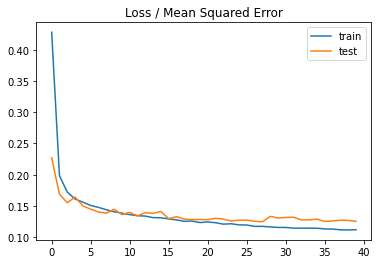

In [0]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_NN2.history['loss'], label='train')
plt.plot(history_NN2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
predict_no_lp = model_NN_2.predict(test_data)
prediction_no_lp = predict_no_lp[:,0]*house_value_sd + house_value_mean
Original_Final_Price_no_lp = test_labels*house_value_sd + house_value_mean
print("Predictions for test housing prices is: {}".format(prediction_no_lp))

Predictions for test housing prices is: [ 476061.16 1040925.4   774756.06 ... 1320822.1   316725.72 1655649.9 ]


In [0]:
regressionSummary(Original_Final_Price_no_lp,prediction_no_lp)
print("Model R Score: {}".format(round(r2_score(Original_Final_Price_no_lp, prediction_no_lp),3)))


Regression statistics

                      Mean Error (ME) : 9634.4350
       Root Mean Squared Error (RMSE) : 184544.0882
            Mean Absolute Error (MAE) : 102380.2766
          Mean Percentage Error (MPE) : -0.4285
Mean Absolute Percentage Error (MAPE) : 12.9789
Model R Score: 0.875


# Ensemble Models - Simple Average method without list price


In the weighted average method, it weights the contribution of each ensemble member based on their performance on the validation dataset. 

To recap the performance of each model (without list price), the beast model is Model 4 Neural Network, followed by Model 3 Decision Tree and Model 2 Linear Regression, the last model is Model 1 LU Decomposition. 

To ensemble the models, we will arbitrarily assign weights to each model. 1/3 to Model 4, 1/3 to Model 3 and 1/3 to Model 2. We will drop Model 1. 

In [0]:
#to clean the data
df = pd.read_csv('/content/Modified Housing with School.csv')
def format_function(DataFrame):
  # drop NaNs
  DataFrame.dropna()
  DataFrame['type']=number.fit_transform(DataFrame['type'].astype('str'))
  return df

# Set variables for mean and std
house_value_mean = df["final_price"].mean()
house_value_sd = df["final_price"].std()
# Normalize Dataset
house_norm = (house_df - house_df.mean()) / house_df.std()

# Running Preprocessing Functions
df = format_function(df)

# Defining Features (X) and Target (Y)
X = df.drop(['final_price','list_price'], axis = 1)
y = df['final_price']

# Train Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
#To normalize data for model 4
# Features for training
features = house_norm.columns
features = features.drop(["final_price", 'list_price'])
# Split into training and testing data
train_portion = 0.7
train_rows = int(house_norm.shape[0] * train_portion)
shuffled_data = house_norm.sample(frac=1)
train_data = shuffled_data[:train_rows]
test_data = shuffled_data[train_rows:]
# Divide training data and labels
train_labels = train_data["final_price"]
train_data = train_data[features]

test_labels = test_data["final_price"]
test_data = test_data[features]

In [0]:
model_4_wa_norm = model_NN_2.predict(test_data)  
model_4_wa_FP = model_4_wa_norm[:,0]*house_value_sd + house_value_mean
regressionSummary(test_labels*house_value_sd+house_value_mean,model_4_wa_FP)
r2_score(test_labels*house_value_sd+house_value_mean,model_4_wa_FP)



Regression statistics

                      Mean Error (ME) : 14504.4246
       Root Mean Squared Error (RMSE) : 167644.3494
            Mean Absolute Error (MAE) : 96740.7303
          Mean Percentage Error (MPE) : 0.0788
Mean Absolute Percentage Error (MAPE) : 12.3106


0.8891401087836572

In [0]:
model_2_wa = model_lr_2.predict(valid_X) 
regressionSummary(valid_y,model_2_wa)
r2_score(valid_y,model_2_wa) 


Regression statistics

                      Mean Error (ME) : 12160.3212
       Root Mean Squared Error (RMSE) : 268213.3745
            Mean Absolute Error (MAE) : 166871.1757
          Mean Percentage Error (MPE) : -3.4879
Mean Absolute Percentage Error (MAPE) : 22.7479


0.7336933772134113

In [0]:
# define the 3rd model Regression Tree model
df['bedrooms'] = df['bedrooms'].astype('category')
df['Dens'] = df['Dens'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')
df['parking'] = df['parking'].astype('category')
df['type'] = df['type'].astype('category')
df['district_code'] = df['district_code'].astype('category')
variables = [ 'bedrooms', 'Dens', 'bathrooms', 'size', 'parking', 
              'type', 'latitude', 'longitude', 'mean_district_income', 'district_code', 'School_min_dist_km']
  
X_model_3 = pd.get_dummies(df[variables], drop_first=True)
y_model_3 = df[outcome]
train_X_3, valid_X_3, train_y_3, valid_y_3 = train_test_split(X_model_3, y_model_3, test_size=0.3, random_state=1) 
model_3_wa = regTree_2.predict(valid_X_3)
regressionSummary(valid_y,model_3_wa)
r2_score(valid_y,model_3_wa) 


Regression statistics

                      Mean Error (ME) : -2852.3112
       Root Mean Squared Error (RMSE) : 229706.0529
            Mean Absolute Error (MAE) : 110600.7935
          Mean Percentage Error (MPE) : -2.4343
Mean Absolute Percentage Error (MAPE) : 12.3397


0.804671333459894

In [0]:
# to apply simple average method
def ensemble_models_WA():

  finalpred_wa = model_2_wa*1/3 + model_3_wa*1/3 + model_4_wa_FP*1/3
  return finalpred_wa

In [0]:
ensemble_models_WA()

array([1119464.04070061,  593512.3884914 ,  732998.55066745, ...,
        418298.20688775,  923553.3466916 ,  636164.81934834])

In [0]:
regressionSummary(valid_y, ensemble_models_WA())


Regression statistics

                      Mean Error (ME) : 9715.7988
       Root Mean Squared Error (RMSE) : 312592.3099
            Mean Absolute Error (MAE) : 179293.4630
          Mean Percentage Error (MPE) : -9.4840
Mean Absolute Percentage Error (MAPE) : 24.1369


In [0]:
print("Model R Score: {}".format(round(r2_score(valid_y, ensemble_models_WA()),3)))

Model R Score: 0.638


# Exhaustive Search

In [0]:
# loading Facebook dataset as pandas dataframe
df = pd.read_csv('/content/Modified Housing with School.csv')

def format_function(DataFrame):
  # drop NaNs
  DataFrame.dropna()
  DataFrame['type']=number.fit_transform(DataFrame['type'].astype('str'))
  return df

# Running Preprocessing Functions
df = format_function(df)

# Defining Features (X) and Target (Y)
X = df.drop(['final_price','list_price'], axis = 1)
Y = df['final_price']

# Train Test Split
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.3, random_state=1)

In [0]:
# Run an exhaustive search. The Fuel type column is categorical and needs to be converted into dummy variables.

def train_model(variables):
    model_search = LinearRegression()
    model_search.fit(train_X[variables], train_y)
    return model_search

def score_model(model_search, variables):
    pred_y = model_search.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -r2_score(train_y, pred_y)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.max_columns', 999)
print(pd.DataFrame(data, columns=('n', 'r2', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.max_columns',999)

     n        r2            AIC   Dens  School_min_dist_km  bathrooms  \
0    1  0.581205  212120.868079  False               False      False   
1    2  0.702946  209547.205954  False               False      False   
2    3  0.723497  209011.586540  False               False      False   
3    4  0.730686  208816.030738  False               False       True   
4    5  0.733830  208729.968677  False               False       True   
5    6  0.737002  208642.060010  False               False       True   
6    7  0.739993  208558.289192  False               False       True   
7    8  0.740829  208536.132959  False                True       True   
8    9  0.740906  208535.914607  False                True       True   
9   10  0.740929  208537.249231  False                True       True   
10  11  0.740929  208539.248611   True                True       True   

    bedrooms  district_code  latitude  longitude  mean_district_income  \
0      False          False     False      False 